In [27]:
import pandas as pd

In [28]:

vp1_data = pd.read_csv("builds/original_enterovirus_a71/ev_a71/vp1/results/cleaned_metadata.tsv", sep='\t')


geo_regions = pd.read_csv("scripts/geo_regions.tsv",sep='\t')

country_counts = vp1_data['country'].value_counts()

In [29]:
vp1_data['country'] = vp1_data['country'].str.replace (' ', '_')
vp1_data['country'] = vp1_data['country'].str.lower()
vp1_data['country'] = vp1_data['country'].str.replace ('viet_nam', 'vietnam')
vp1_data['country'] = vp1_data['country'].str.replace ('georgia_country', 'georgia')

In [30]:
vp1_data_regions = pd.merge(vp1_data, geo_regions, on="country", how="left")

In [31]:

import math
print(vp1_data_regions[pd.isnull(vp1_data_regions['region'])]['country'].value_counts())

na         537
unknown      6
georgia      2
andorra      1
Name: country, dtype: int64


In [32]:
len(vp1_data.index)

9626

In [33]:

from datetime import datetime



dates = vp1_data['date']

cleaned_dates = []

nan_date_counter = 0
cleaned_date_counter = 0
unchanged_date_counter = 0

for date in dates:
    if date.count("XX") == 3:
        nan_date_counter += 1
        
    elif date.count("XX") == 2:
        newDate = date[:-6]
        cleaned_date_counter += 1
        date_time_obj = datetime.strptime(newDate, '%Y')
        cleaned_dates.append(date_time_obj)
        
    elif date.count("XX") == 1:
        newDate = date[:-3]
        cleaned_date_counter += 1
        date_time_obj = datetime.strptime(newDate, '%Y-%m')
        cleaned_dates.append(date_time_obj)
        
    elif date.count("XX") == 0 and len(date) == 10:
        newDate = date
        unchanged_date_counter += 1
        date_time_obj = datetime.strptime(newDate, '%Y-%m-%d')
        cleaned_dates.append(date_time_obj)
        
    else:
        nan_date_counter +=1
    
print(dates.count())
print(nan_date_counter)
print(cleaned_date_counter)
print(unchanged_date_counter)

cleaned_dates_df = pd.DataFrame(cleaned_dates, columns = ['date'])


#vp1_data_regions['year'] = vp1_data_regions['']

9626
1422
5755
2449


In [45]:
vp1_data_regions['year'] = cleaned_dates_df["date"].dt.year

vp1_data_regions_years = vp1_data_regions

In [35]:
year_counts = dates_dataframe[(dates_dataframe['date'] > '1985-01-01')].groupby(dates_dataframe["date"].dt.year).count()

print(type(country_counts))
print(type(year_counts.squeeze()))
print(year_counts.squeeze())




<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
date
1986      45
1987       4
1990      11
1991      12
1992       7
1993       1
1994       7
1995       3
1996       1
1997      19
1998     133
1999      27
2000     139
2001     189
2002      97
2003     131
2004      70
2005      58
2006     173
2007     269
2008     662
2009     570
2010    1290
2011     761
2012     825
2013     619
2014     623
2015     355
2016     547
2017     401
2018      68
2019      34
Name: date, dtype: int64


/Users/simongrimm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Sampling Year'), Text(0, 0.5, 'n_sequences')]

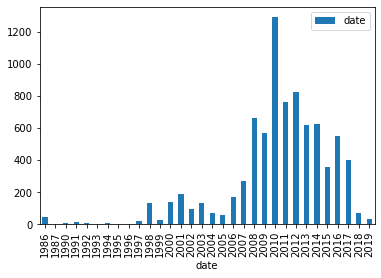

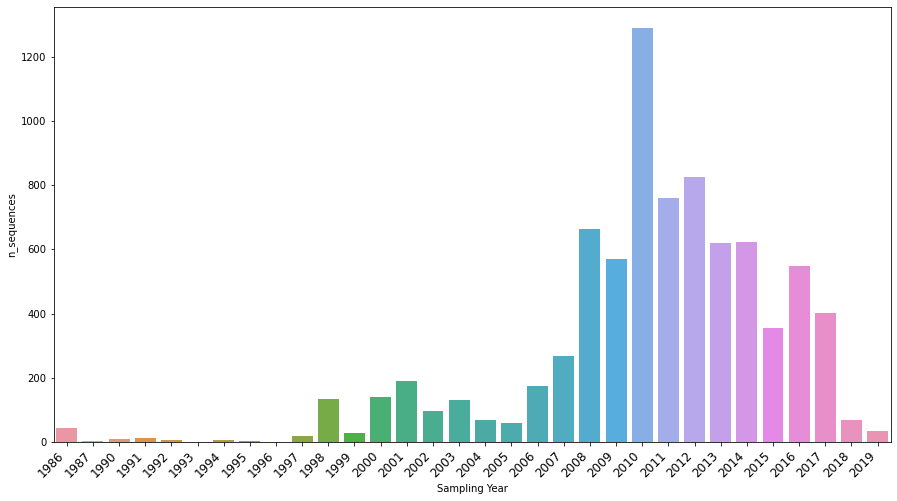

In [36]:
grouped = dates_dataframe.groupby(dates_dataframe["date"].dt.year)

dates_dataframe[(dates_dataframe['date'] > '1985-01-01')].groupby(dates_dataframe["date"].dt.year).count().plot(kind="bar")

#
#See here for advice on how to create a stacked histogram: https://seaborn.pydata.org/examples/histogram_stacked.html
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plot = sns.barplot(year_counts.squeeze().index, year_counts.squeeze().values)
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
    fontweight='light',
    fontsize='large',
    
)
plot.set(xlabel='Sampling Year', ylabel='n_sequences' )




(1997.0, 2021.0)

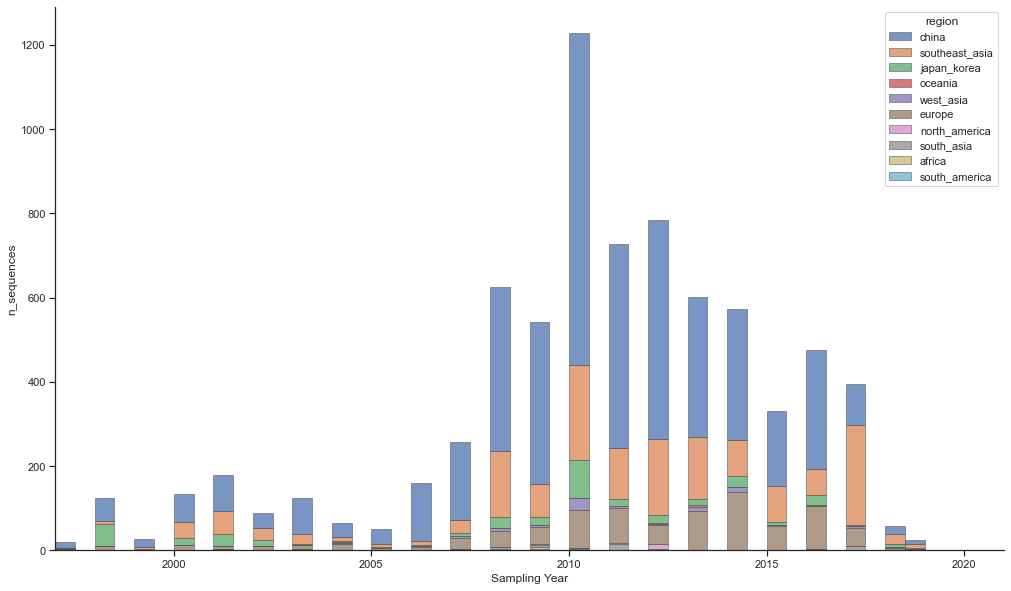

In [57]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(17, 10))
sns.despine(f)

vp1_data_regions_years_from_1985 = vp1_data_regions_years[vp1_data_regions_years['year'] > 1985]

plot = sns.histplot(
    vp1_data_regions_years_from_1985,
    x = 'years', hue='region',
    multiple="stack",
    palette= "deep",
    edgecolor=".3",
    linewidth=.5,
)
plot.set(xlabel='Sampling Year', ylabel='n_sequences' )

plot.set_xlim(1997, 2021)

#further advice on this: https://seaborn.pydata.org/tutorial/distributions.html, 
# https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368
# https://medium.economist.com/making-a-metric-4831ff4cc800
# https://medium.economist.com/more-than-meets-the-eye-2d22c2de1fc2






In [ ]:
other_countries = pd.Series([country_counts.loc['Russia':'Ukraine'].sum()], index=['Other'])
print(other_countries)


Other    575
dtype: int64


In [ ]:
country_counts_other = country_counts.loc['China':'France'].append(other_countries)

In [ ]:
print(country_counts_other)

China          4784
Viet Nam       1006
Taiwan          887
Na              537
Japan           463
Malaysia        282
Thailand        270
Germany         253
Netherlands     237
Spain           209
France          123
Other           575
dtype: int64


/Users/simongrimm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Country'), Text(0, 0.5, 'n_sequences')]

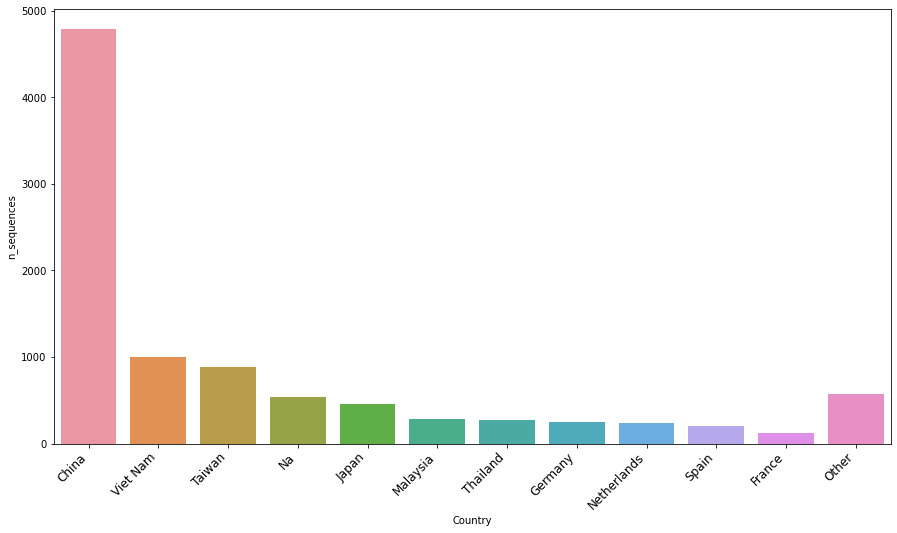

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plot = sns.barplot(country_counts_other.index, country_counts_other.values)
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
    fontweight='light',
    fontsize='large',
    
)
plot.set(xlabel='Country', ylabel='n_sequences' )


# Potential solution:

First, in the code above create a dataframe that marks 2012-01-01 as a datetime with year ONLY.

Calculate delta between the earliest date and all other dates.

Create histogram of this delta, but assign Dates to x axis.

Create Tick at 365 apart, calling it the beginning of that year.

The code below doesn't work.

In [ ]:
import pandas as pd

import plotly.express as px

df = pd.DataFrame()

df['Date'] = pd.Series(cleaned_dates)

df['year'] = df['Date'].dt.year

df['mthday'] = df['Date'].dt.strftime('%d-%b')

df=df.sort_values(by='Date') 

plot=px.line(df,x='Date',y='value',color='year')

In [ ]:
vp1_data["date"] = vp1_data["date"].astype("datetime64")
